# DATA VISUALIZATION

***DATA SOURCE*** : https://www.kaggle.com/code/rhettchase/flight-price-predictions/input

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

**UPLOADING THE DATASET**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Clean_Dataset.csv to Clean_Dataset.csv


**READING THE FLIGHT DATA**

In [ ]:
df = pd.read_csv("Clean_Dataset.csv")

**OVERVIEW OF THE DATASET**

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


**VISUALIZATION**

In [ ]:
# Retrieve required attributes
airline_class_data = df.groupby(['airline', 'class']).size().unstack()
departure_arrival_data = df[['departure_time', 'arrival_time']]
stops_class_data = df.groupby(['stops', 'class']).size().unstack()
duration_class_data = {class_type: df[df['class'] == class_type]['duration'] for class_type in df['class'].unique()}
price_data = df['price']


In [ ]:
print(airline_class_data)
print(departure_arrival_data)
print(stops_class_data)
print(price_data)

class      Business  Economy
airline                     
AirAsia         NaN  16098.0
Air_India   32898.0  47994.0
GO_FIRST        NaN  23173.0
Indigo          NaN  43120.0
SpiceJet        NaN   9011.0
Vistara     60589.0  67270.0
       departure_time   arrival_time
0             Evening          Night
1       Early_Morning        Morning
2       Early_Morning  Early_Morning
3             Morning      Afternoon
4             Morning        Morning
...               ...            ...
300148        Morning        Evening
300149      Afternoon          Night
300150  Early_Morning          Night
300151  Early_Morning        Evening
300152        Morning        Evening

[300153 rows x 2 columns]
class        Business  Economy
stops                         
one             84302   166561
two_or_more      1083    12203
zero             8102    27902
0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    7909

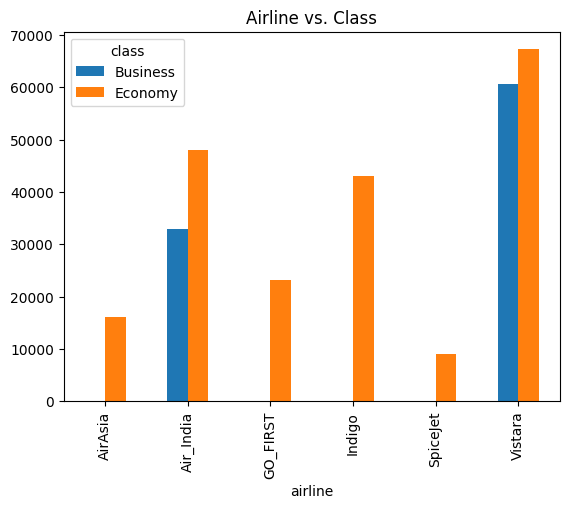

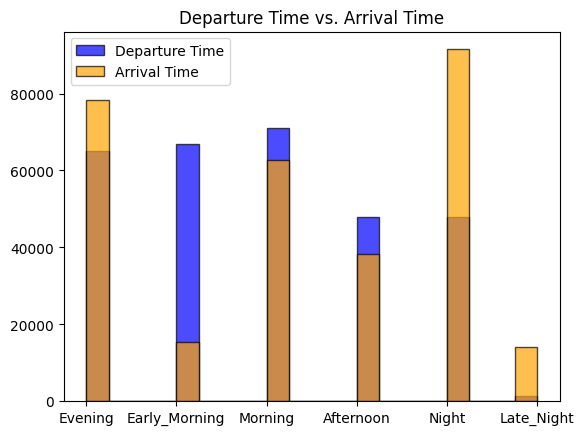

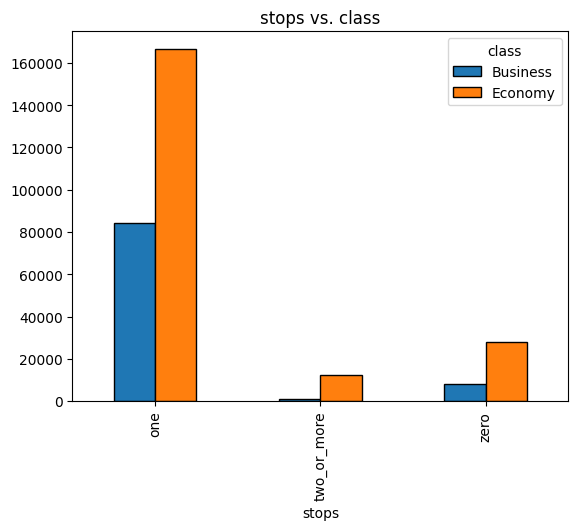

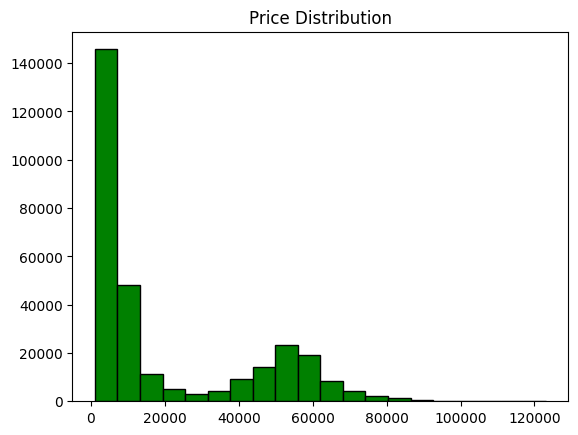

In [ ]:
# Create visualizations

# Bar plot for 'Airline vs. Class'
airline_class_data.plot(kind='bar', title='Airline vs. Class')
plt.show()

# Histogram for 'Departure Time' and 'Arrival Time'
plt.hist(departure_arrival_data['departure_time'], color='blue', alpha=0.7, label='Departure Time', bins=20,edgecolor="black")
plt.hist(departure_arrival_data['arrival_time'], color='orange', alpha=0.7, label='Arrival Time', bins=20,edgecolor="black")
plt.title('Departure Time vs. Arrival Time')
plt.legend()
plt.show()

# bar plot for 'Stops vs. Class'
stops_class_data.plot(kind='bar', title='stops vs. class',edgecolor="black")
plt.show()

# Create histogram for 'Price'
plt.hist(price_data, color='green', bins=20 ,edgecolor="black")
plt.title('Price Distribution')
plt.show()